# Load the saved models

In [1]:
import joblib

# Load Random Forest model
rf_model = joblib.load('../saved_models/random_forest_fraud_model.pkl')

# Load Logistic Regression model
lr_model = joblib.load('../saved_models/logistic_regression_fraud_model.pkl')

# Load Neural Network Model (if applicable)
from tensorflow.keras.models import load_model
cnn_model_fraud = load_model('../saved_models/RNN_fraud_model.h5')

# Load LSTM model
lstm_model_fraud = load_model('../saved_models/LSTM_fraud_model.h5')

# Load decision tree model
tree_model = joblib.load('../saved_models/decision_tree_fraud_model.pkl')

# Load model
gradient_model = joblib.load('../saved_models/gradient_boosting_fraud_model.pkl')

# Load model
mlp_model = joblib.load('../saved_models/MLP_fraud_model.pkl')

# Load the test data

In [3]:
import pandas as pd

# Load test data from CSV if necessary
X_fraud_test = pd.read_csv('../data/splittedData/X_fraud.csv')
y_fraud_test = pd.read_csv('../data/splittedData/y_fraud.csv')

X_fraud_test.head()
# y_fraud_test.head()

,purchase_value,age,transaction_velocity,purchase_hour,purchase_day_of_week,country_encoded,browser_encoded,source_encoded,sex_M,signup_year,signup_month,signup_hour,time_diff_hours
0,47,30,3632215.0,3,6,1844,21074,51960,False,2015,6,3,1008.948611
1,15,34,1231637.0,20,2,291,52560,51960,False,2015,1,14,342.121389
2,44,29,1997534.0,23,5,12038,31364,51067,True,2015,3,20,554.870556
3,55,30,7640897.0,16,5,12038,52560,26119,False,2015,2,6,2122.471389
4,51,37,10249579.0,4,1,291,52560,51960,False,2015,7,12,2847.105278


# SHAP (SHapley Additive exPlanations)

###  Random Forest Model

c:\Users\wubeshet.abera\Projects\Ten-Academy\Fraud-detection-system\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


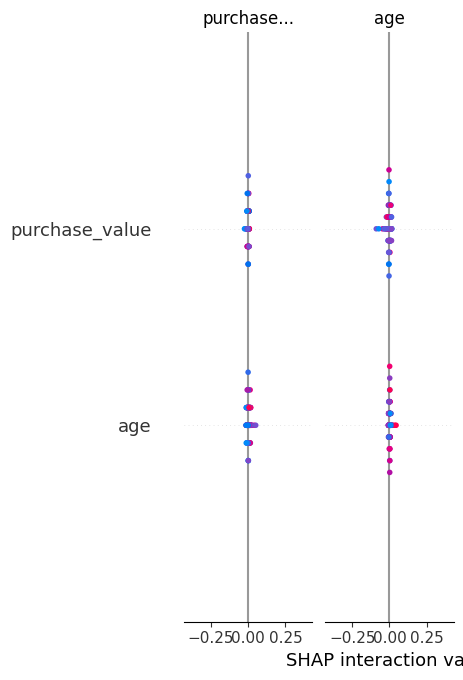

In [4]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Random Forest model
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(rf_shap_values, X_sample, feature_names=X_sample.columns)


### Logistic Regression Model

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

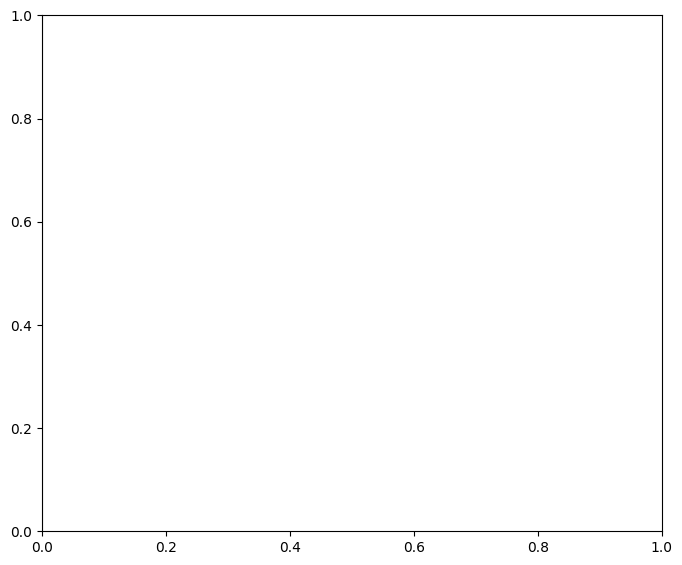

In [5]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Logistic Regression model
lr_explainer = shap.LinearExplainer(lr_model, X_sample)
lr_shap_values = lr_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(lr_shap_values, X_sample, feature_names=X_sample.columns)


In [6]:
print(X_sample.dtypes)


purchase_value            int64
age                       int64
transaction_velocity    float64
purchase_hour             int64
purchase_day_of_week      int64
country_encoded           int64
browser_encoded           int64
source_encoded            int64
sex_M                      bool
signup_year               int64
signup_month              int64
signup_hour               int64
time_diff_hours         float64
dtype: object


### Decision tree

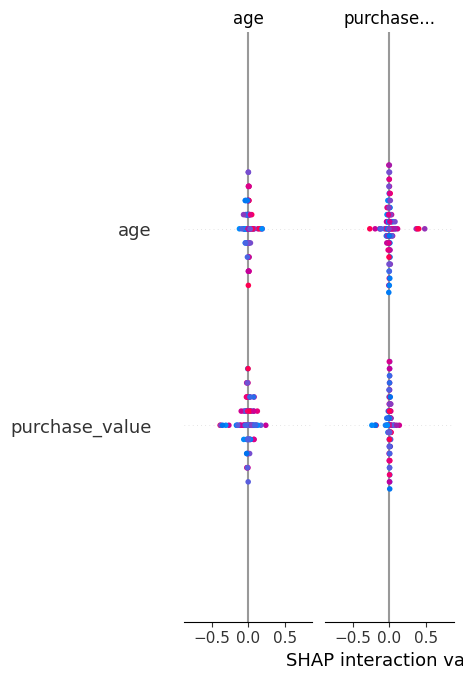

In [7]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Decision Tree model
tree_explainer = shap.TreeExplainer(tree_model)
tree_shap_values = tree_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(tree_shap_values, X_sample, feature_names=X_sample.columns)


 ### Gradient Boosting Model

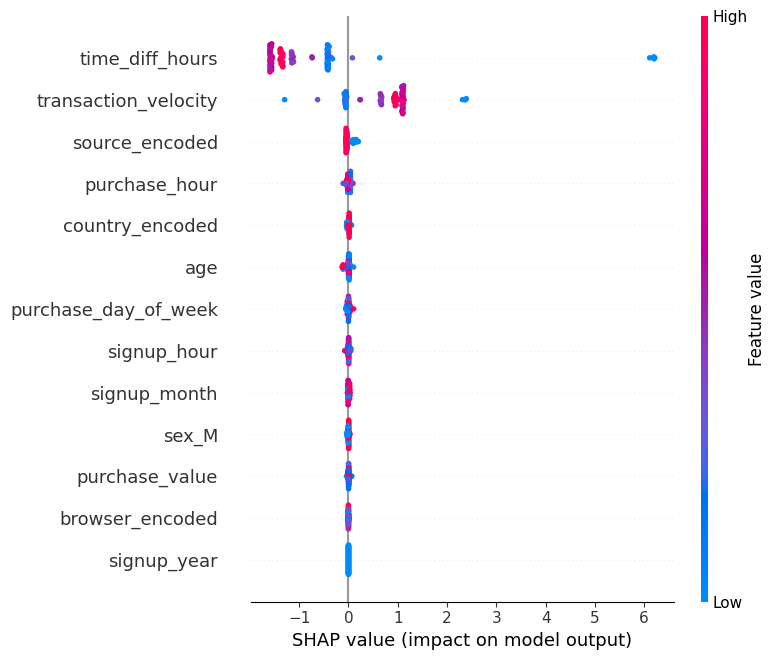

In [8]:
import shap

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Create a SHAP explainer for the Gradient Boosting model
gradient_explainer = shap.TreeExplainer(gradient_model)
gradient_shap_values = gradient_explainer.shap_values(X_sample)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(gradient_shap_values, X_sample, feature_names=X_sample.columns)


### Multi-layer Perceptron (MLP) Model

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


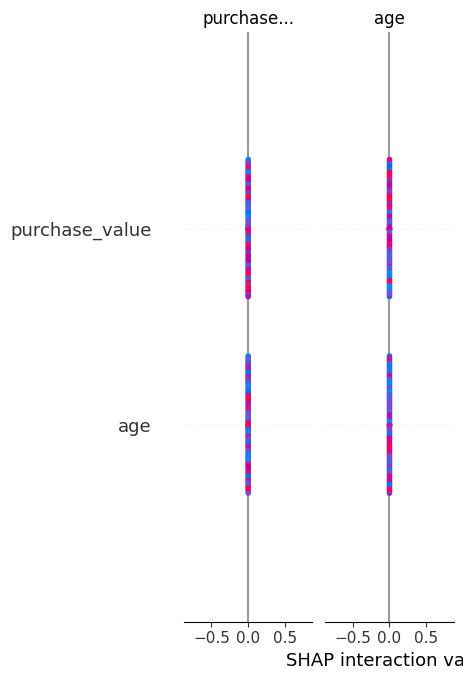

In [9]:
import shap
import numpy as np

# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Convert the data to float32 for compatibility (if needed)
X_sample_float = X_sample.astype('float32')

# Reshape the data as needed, depending on how the MLP model expects the input shape
X_sample_reshaped = np.array(X_sample_float)

# Create a SHAP explainer using KernelExplainer for the MLP model
mlp_explainer = shap.KernelExplainer(mlp_model.predict_proba, X_sample_reshaped[:10])  # Background sample

# Calculate SHAP values
mlp_shap_values = mlp_explainer.shap_values(X_sample_reshaped)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(mlp_shap_values, X_sample_reshaped, feature_names=X_sample.columns)


###  LSTM Model

In [10]:
import shap
import numpy as np

# Sample a smaller subset for SHAP analysis
sample_size = 100
X_sample = X_fraud_test.sample(n=sample_size, random_state=42)

# Convert to float32 for TensorFlow compatibility
X_sample_float = X_sample.astype('float32')

# Reshape the data to 3D shape (samples, time steps, features) for the LSTM model
X_sample_reshaped = np.reshape(X_sample_float.to_numpy(), (X_sample_float.shape[0], 1, X_sample_float.shape[1]))

# Define a prediction function that reshapes 2D input back into 3D before passing to the LSTM model
def lstm_predict_reshaped(X):
    X_reshaped = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # Reshape to 3D (samples, time steps, features)
    return lstm_model_fraud.predict(X_reshaped)

# Flatten the 3D input to 2D to pass to SHAP's KernelExplainer
X_sample_flat = X_sample_reshaped.reshape(X_sample_reshaped.shape[0], -1)

# Create a KernelExplainer for the LSTM model
lstm_explainer = shap.KernelExplainer(lstm_predict_reshaped, X_sample_flat[:10])  # Smaller background sample
lstm_shap_values = lstm_explainer.shap_values(X_sample_flat)

# Plot the SHAP values
shap.initjs()
shap.summary_plot(lstm_shap_values, X_sample_flat, feature_names=X_sample.columns)


Provided model function fails when applied to the provided data set.


ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 13 and 22 for '{{node sequential_2_1/lstm_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_2_1/lstm_1/strided_slice_1, sequential_2_1/lstm_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [10,13], [22,256].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(10, 13), dtype=float32)
  • states=('tf.Tensor(shape=(10, 64), dtype=float32)', 'tf.Tensor(shape=(10, 64), dtype=float32)')
  • training=False

### Neural Network (RNN) Model

In [11]:
# Sample a smaller subset for SHAP analysis
sample_size = 100  # Adjust based on your needs
X_sample = X_fraud_test[expected_feature_columns].sample(n=sample_size, random_state=42)

# Convert to float32 to ensure compatibility with TensorFlow
X_sample = X_sample.astype(np.float32)

# Define time_steps and num_features based on your CNN's input layer
time_steps = 2  # Set this according to your input shape
num_features = len(expected_feature_columns)  # Should match the number of selected features

# Check the shape of X_sample before reshaping
print("Original sample shape:", X_sample.shape)

# Calculate the number of complete batches
num_batches = X_sample.shape[0] // time_steps
print(f"Number of complete batches: {num_batches}")

# Adjust sample size to fit complete batches
adjusted_sample_size = num_batches * time_steps
print(f"Adjusted sample size for reshaping: {adjusted_sample_size}")

# Slice the data to the adjusted sample size if necessary
X_sample = X_sample.iloc[:adjusted_sample_size]

# Debugging: Check the new shape of the sliced input
print("Sliced sample shape:", X_sample.shape)

# Check if the total number of elements can be reshaped correctly
total_elements = X_sample.size
print(f"Total elements in X_sample: {total_elements}")

# Reshape the input to match the expected input shape of your CNN model
try:
    X_sample_reshaped = X_sample.values.reshape((-1, time_steps, num_features))  # Use -1 to infer batch size
except ValueError as e:
    raise ValueError(f"Reshape failed: {e}. Check if your data has the correct dimensions for the reshape.")

# Debugging: Check the shape of the reshaped input
print("Reshaped input shape:", X_sample_reshaped.shape)

# Create a SHAP explainer for the CNN model using DeepExplainer
cnn_explainer = shap.DeepExplainer(cnn_model_fraud, X_sample_reshaped)

# Calculate SHAP values
cnn_shap_values = cnn_explainer.shap_values(X_sample_reshaped)

# Plot the SHAP values for the sampled instances
shap.initjs()
shap.summary_plot(cnn_shap_values, X_sample_reshaped, feature_names=expected_feature_columns)


NameError: name 'expected_feature_columns' is not defined